# CO543 - Image Processing
## Lab 04 - Part 2 using CNN

- E/19/129
- K. H. Gunawardana


In [1]:
import os
from google.colab import drive

path = "/content/drive/My Drive/ML/CO543/lab04/"

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [3]:
train_df = pd.read_csv(path + "fashion-mnist_train.csv")
test_df = pd.read_csv(path + "fashion-mnist_test.csv")

In [4]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
from sklearn.preprocessing import StandardScaler

X_train = train_df.iloc[:, 1:].values.astype("float32") / 255.0
y_train = train_df["label"].values.astype("int32")
X_test = test_df.iloc[:, 1:].values.astype("float32") / 255.0
y_test = test_df["label"].values.astype("int32")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

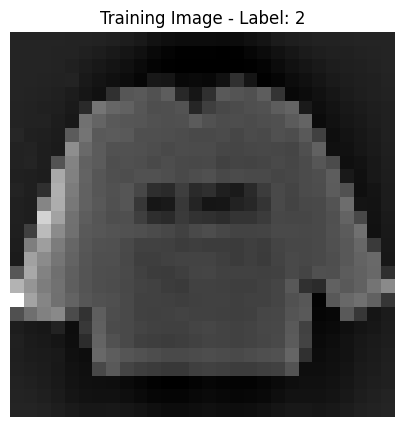

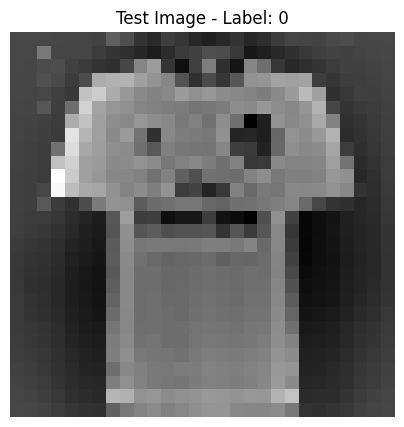

In [28]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Plot the first image in the training set
plt.figure(figsize=(5, 5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Training Image - Label: {y_train[0]}')
plt.axis('off')
plt.show()

# Plot the first image in the test set
plt.figure(figsize=(5, 5))
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Test Image - Label: {y_test[0]}')
plt.axis('off')
plt.show()

In [25]:
X_train.shape

(60000, 28, 28, 1)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [12]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Learning rate scheduler (optional)
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * 0.1  # Reduce learning rate after 5 epochs

model.compile(optimizer=Adam(learning_rate=0.001),  # Lower initial learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate schedule callback (optional)
learning_rate_scheduler = LearningRateScheduler(scheduler)

In [14]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[learning_rate_scheduler], batch_size=64)

Epoch 1/15
750/750 [==============================] - 249s 331ms/step - loss: 0.3328 - accuracy: 0.8814 - val_loss: 0.2692 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 2/15
750/750 [==============================] - 244s 326ms/step - loss: 0.2900 - accuracy: 0.8957 - val_loss: 0.2574 - val_accuracy: 0.9070 - lr: 0.0010
Epoch 3/15
750/750 [==============================] - 242s 322ms/step - loss: 0.2669 - accuracy: 0.9036 - val_loss: 0.2256 - val_accuracy: 0.9175 - lr: 0.0010
Epoch 4/15
750/750 [==============================] - 242s 323ms/step - loss: 0.2438 - accuracy: 0.9114 - val_loss: 0.2453 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 5/15
750/750 [==============================] - 237s 316ms/step - loss: 0.2280 - accuracy: 0.9184 - val_loss: 0.2637 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 6/15
750/750 [==============================] - 233s 311ms/step - loss: 0.1861 - accuracy: 0.9322 - val_loss: 0.1942 - val_accuracy: 0.9292 - lr: 1.0000e-04
Epoch 7/15
750/750 [======================

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 12s 37ms/step - loss: 0.1936 - accuracy: 0.9299
Test accuracy: 0.9298999905586243
